In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random as python_random

2023-02-26 14:59:27.068982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
meta_df = pd.read_csv('../train_val_test_split/train_val_test_sgkf_Feb26_allFiles_sum1.csv', index_col=0)
meta_df

,file,source,category,weight,file_group,fold
0,../data/interim/youtube/NatureSoundscapes/6LpA...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/6LpAnfislTc,6
1,../data/interim/youtube/NomadicAmbience_nature...,nature_youtube/NomadicAmbience_nature,0,0.005714,youtube/NomadicAmbience_nature/wlCrnlQ5ofE,0
2,../data/interim/SONYC/audio-10/05_027168.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-10/05_027168.pkl,4
3,../data/interim/SONYC/audio-13/32_019485.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-13/32_019485.pkl,8
4,../data/interim/SONYC/audio-13/33_016321.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-13/33_016321.pkl,5
...,...,...,...,...,...,...
5677,"../data/interim/GoogleAudioSet/Outside, urban ...",city_GoogleAudioSet,1,0.005882,"../data/interim/GoogleAudioSet/Outside, urban ...",9
5678,../data/interim/youtube/NatureSoundscapes/gEqK...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/gEqKnRu15bI,2
5679,../data/interim/youtube/NatureSoundscapes/PFtx...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/PFtxRv6GcFw,8
5680,../data/interim/SONYC/audio-17/03_001923.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-17/03_001923.pkl,8


In [3]:
def load_df_pkl(filename, indices):
    import pickle
    import pandas as pd
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df = output[indices]

    # close the file
    file.close()
    return df

In [4]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices'))
    
df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)

df

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,category,fold,source,weight
0,3168.3,-4.917383e-11,0.01,-0.038741,10.787897,73.020597,-10.896017,3.033336,0.285233,0.889860,...,37016.834367,0.990615,0.472085,1.495231,11,0.442122,0,6,nature_youtube/NatureSoundscapes,0.000479
1,3783.1,5.465001e-10,0.01,0.324149,33.784624,73.020601,-10.399343,1.977237,0.302018,0.802993,...,33267.856238,0.993769,0.461715,1.331546,27,2.633893,0,0,nature_youtube/NomadicAmbience_nature,0.005714
2,530.5,1.907349e-10,0.01,-0.000379,3.175302,73.020601,-13.041456,0.514603,0.222806,0.977961,...,2439.843419,0.878735,0.017234,1.220867,17,0.879848,1,4,city_SONYC,0.000433
3,374.6,6.139279e-10,0.01,-0.066683,2.703640,73.020597,-13.815996,0.538294,0.203798,0.978096,...,1994.414258,0.759264,0.019362,1.406525,8,0.528788,1,8,city_SONYC,0.000433
4,1087.4,-9.059906e-10,0.01,0.017096,2.939691,73.020597,-12.709298,0.335519,0.231492,0.977624,...,4914.901224,0.833037,0.119948,1.406073,41,6.454105,1,5,city_SONYC,0.000433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,1410.2,1.142919e-09,0.01,-0.012574,2.899899,73.020601,-11.393145,0.082236,0.269366,0.991767,...,10055.657141,0.946976,0.103472,1.284188,3,0.147583,1,9,city_GoogleAudioSet,0.005882
5678,540.6,-2.801418e-10,0.01,0.025844,3.292901,73.020601,-13.260077,0.605169,0.217268,0.976135,...,2395.371538,0.875839,0.012907,1.216855,4,1.195112,0,2,nature_youtube/NatureSoundscapes,0.000479
5679,5666.8,-7.987022e-10,0.01,0.023222,5.691379,73.020597,-11.640635,1.451397,0.261799,0.945991,...,44700.692220,0.992981,0.520530,1.713805,39,6.721639,0,8,nature_youtube/NatureSoundscapes,0.000479
5680,1297.4,-2.723932e-09,0.01,0.017762,3.133450,73.020601,-11.636633,0.474801,0.261920,0.982117,...,11274.696534,0.938413,0.119799,1.400830,3,0.261254,1,8,city_SONYC,0.000433


In [5]:
# check the weight
df.groupby(['source'])['weight'].sum()

source
city_GoogleAudioSet                      1.0
city_SONYC                               1.0
city_youtube/NomadicAmbience_city        1.0
nature_AmbisonicSoundLibrary             1.0
nature_GoogleAudioSet                    1.0
nature_S2L_LULC                          1.0
nature_youtube/NatureSoundscapes         1.0
nature_youtube/NomadicAmbience_nature    1.0
Name: weight, dtype: float64

In [6]:
## data preprocessing
def df_preproc(df):

    # replacing the inf values by NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    train_category = df[df['fold']<8]['category']
    val_category = df[df['fold']==8]['category']
    test_category = df[df['fold']==9]['category']

    train_source = df[df['fold']<8]['source']
    val_source = df[df['fold']==8]['source']
    test_source = df[df['fold']==9]['source']
    
    train_weight = df[df['fold']<8]['weight']
    val_weight = df[df['fold']==8]['weight']
    test_weight = df[df['fold']==9]['weight']

    train_df = df[df['fold']<8].drop(columns=['fold','category','source','weight'])
    val_df = df[df['fold']==8].drop(columns=['fold','category','source','weight'])
    test_df = df[df['fold']==9].drop(columns=['fold','category','source','weight'])

    # replace the nan by mean
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
          ,('scaler', StandardScaler())
    ])

    transformer.fit(train_df)
    train_df = pd.DataFrame(transformer.transform(train_df), columns=train_df.columns)
    val_df = pd.DataFrame(transformer.transform(val_df), columns=val_df.columns)
    test_df = pd.DataFrame(transformer.transform(test_df), columns=test_df.columns)
    
    return train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight


In [7]:
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

# Shared model parameters

In [8]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
my_classes = ['city', 'nature']
weighted_metrics=['accuracy'] # or []
loss_weights=None # or None
learning_rate=0.001

Sequential_model = [
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(30, activation='relu'),
#     tf.keras.layers.Dropout(.5),
#     tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2)
]

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

# Raw indices

In [9]:
# import the necessary packages

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)


model = tf.keras.Sequential(Sequential_model, name='model')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


2023-02-26 14:59:42.044146: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# the optimizer needs to be reset every time
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss_func,
              optimizer=optimizer,
              weighted_metrics=weighted_metrics,
              loss_weights=loss_weights,
              metrics=['accuracy'])

history = model.fit(x=train_df,
                    y=train_category,
                    epochs=50,
                    validation_data=(val_df, val_category),
                    callbacks=callback,
                    sample_weight=train_weight)


Epoch 1/50
143/143 [==============================] - 1s 3ms/step - loss: 9.5914e-04 - accuracy: 0.7171 - weighted_accuracy: 0.6501 - val_loss: 0.4641 - val_accuracy: 0.8327 - val_weighted_accuracy: 0.8327
Epoch 2/50
143/143 [==============================] - 0s 1ms/step - loss: 8.0256e-04 - accuracy: 0.7807 - weighted_accuracy: 0.7188 - val_loss: 0.4327 - val_accuracy: 0.8434 - val_weighted_accuracy: 0.8434
Epoch 3/50
143/143 [==============================] - 0s 1ms/step - loss: 7.4842e-04 - accuracy: 0.7987 - weighted_accuracy: 0.7441 - val_loss: 0.3860 - val_accuracy: 0.8701 - val_weighted_accuracy: 0.8701
Epoch 4/50
143/143 [==============================] - 0s 1ms/step - loss: 7.7125e-04 - accuracy: 0.8224 - weighted_accuracy: 0.7483 - val_loss: 0.3727 - val_accuracy: 0.8808 - val_weighted_accuracy: 0.8808
Epoch 5/50
143/143 [==============================] - 0s 1ms/step - loss: 7.2462e-04 - accuracy: 0.8352 - weighted_accuracy: 0.7607 - val_loss: 0.3800 - val_accuracy: 0.8790 - 

In [11]:
loss, accuracy, w_acc = model.evaluate(x=test_df, y=test_category)


18/18 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8741 - weighted_accuracy: 0.8741


18/18 [==============================] - 0s 957us/step


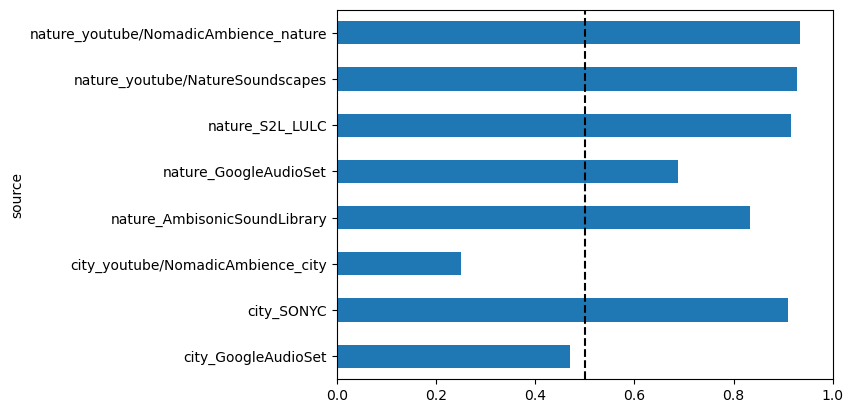

In [12]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Background indices

In [13]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_bg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential(Sequential_model, name='bg_model')

model.summary()


Model: "bg_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss_func,
              optimizer=optimizer,
              weighted_metrics=weighted_metrics,
              loss_weights=loss_weights,
              metrics=['accuracy'])

history = model.fit(x=train_df,
                    y=train_category,
                    epochs=50,
                    validation_data=(val_df, val_category),
                    callbacks=callback,
                    sample_weight=train_weight)


Epoch 1/50
143/143 [==============================] - 1s 2ms/step - loss: 6.7854e-04 - accuracy: 0.8396 - weighted_accuracy: 0.7780 - val_loss: 0.3218 - val_accuracy: 0.8879 - val_weighted_accuracy: 0.8879
Epoch 2/50
143/143 [==============================] - 0s 1ms/step - loss: 6.8362e-04 - accuracy: 0.8459 - weighted_accuracy: 0.7711 - val_loss: 0.3143 - val_accuracy: 0.8790 - val_weighted_accuracy: 0.8790
Epoch 3/50
143/143 [==============================] - 0s 1ms/step - loss: 6.6032e-04 - accuracy: 0.8464 - weighted_accuracy: 0.7857 - val_loss: 0.2984 - val_accuracy: 0.8932 - val_weighted_accuracy: 0.8932
Epoch 4/50
143/143 [==============================] - 0s 1ms/step - loss: 6.8349e-04 - accuracy: 0.8433 - weighted_accuracy: 0.7686 - val_loss: 0.2982 - val_accuracy: 0.8879 - val_weighted_accuracy: 0.8879
Epoch 5/50
143/143 [==============================] - 0s 1ms/step - loss: 6.6714e-04 - accuracy: 0.8567 - weighted_accuracy: 0.7736 - val_loss: 0.3127 - val_accuracy: 0.8737 - 

In [16]:
loss, accuracy, w_acc = model.evaluate(x=test_df, y=test_category)


18/18 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8670 - weighted_accuracy: 0.8670


18/18 [==============================] - 0s 1ms/step


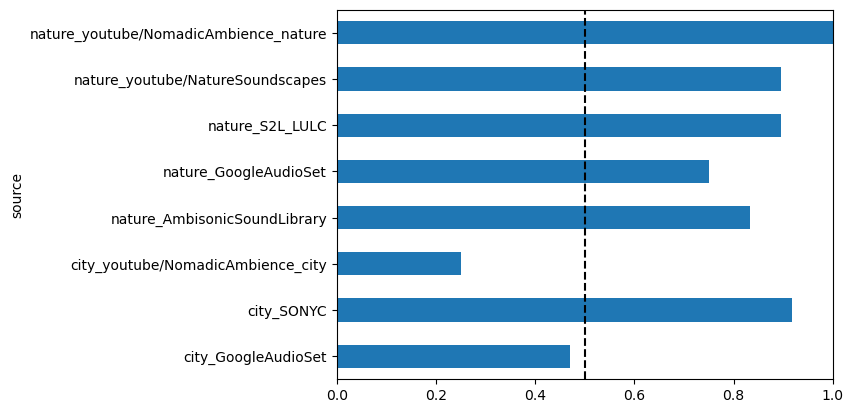

In [17]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Foreground indices

In [18]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_fg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential(Sequential_model, name='fg_model')

model.summary()


Model: "fg_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss_func,
              optimizer=optimizer,
              weighted_metrics=weighted_metrics,
              loss_weights=loss_weights,
              metrics=['accuracy'])

history = model.fit(x=train_df,
                    y=train_category,
                    epochs=50,
                    validation_data=(val_df, val_category),
                    callbacks=callback,
                    sample_weight=train_weight)

Epoch 1/50
143/143 [==============================] - 1s 2ms/step - loss: 7.7705e-04 - accuracy: 0.7662 - weighted_accuracy: 0.7273 - val_loss: 0.4265 - val_accuracy: 0.8078 - val_weighted_accuracy: 0.8078
Epoch 2/50
143/143 [==============================] - 0s 1ms/step - loss: 7.7947e-04 - accuracy: 0.7680 - weighted_accuracy: 0.7262 - val_loss: 0.4132 - val_accuracy: 0.8327 - val_weighted_accuracy: 0.8327
Epoch 3/50
143/143 [==============================] - 0s 1ms/step - loss: 7.6643e-04 - accuracy: 0.7711 - weighted_accuracy: 0.7149 - val_loss: 0.4124 - val_accuracy: 0.8292 - val_weighted_accuracy: 0.8292
Epoch 4/50
143/143 [==============================] - 0s 1ms/step - loss: 7.8229e-04 - accuracy: 0.7781 - weighted_accuracy: 0.7243 - val_loss: 0.4049 - val_accuracy: 0.8399 - val_weighted_accuracy: 0.8399
Epoch 5/50
143/143 [==============================] - 0s 1ms/step - loss: 7.5168e-04 - accuracy: 0.7840 - weighted_accuracy: 0.7383 - val_loss: 0.4066 - val_accuracy: 0.8630 - 

In [21]:
loss, accuracy, w_acc = model.evaluate(x=test_df, y=test_category)


18/18 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8369 - weighted_accuracy: 0.8369


18/18 [==============================] - 0s 988us/step


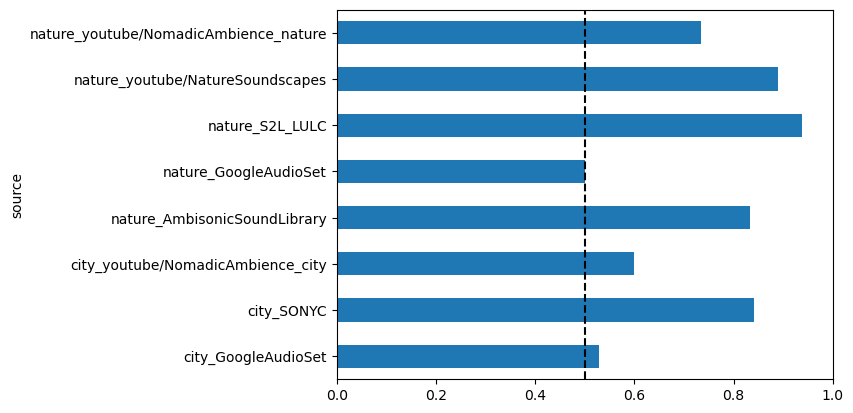

In [22]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# all 3 indices

In [23]:
df_raw_list = []
df_bg_list = []
df_fg_list = []
for index, row in meta_df.iterrows():
    df_raw_list.append(load_df_pkl(row['file'], indices='df_indices'))
    df_bg_list.append(load_df_pkl(row['file'], indices='df_indices_bg'))
    df_fg_list.append(load_df_pkl(row['file'], indices='df_indices_fg'))

df_raw = pd.concat(df_raw_list, ignore_index=True)
df_raw.columns = list('raw_'+df_raw.columns)    

df_bg = pd.concat(df_bg_list, ignore_index=True)
df_bg.columns = list('bg_'+df_bg.columns)

df_fg = pd.concat(df_fg_list, ignore_index=True)
df_fg.columns = list('fg_'+df_fg.columns)

In [24]:
df = pd.concat([df_raw, df_bg, df_fg, meta_df[['category','fold','source','weight']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(.5),
#     tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2)
], name='all_model')

model.summary()

Model: "all_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 180)               0         
                                                                 
 dense (Dense)               (None, 60)                10860     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 122       
                                                                 
Total params: 10,982
Trainable params: 10,982
Non-trainable params: 0
_________________________________________________________________


In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss_func,
              optimizer=optimizer,
              weighted_metrics=weighted_metrics,
              loss_weights=loss_weights,
              metrics=['accuracy'])

history = model.fit(x=train_df,
                    y=train_category,
                    epochs=50,
                    validation_data=(val_df, val_category),
                    callbacks=callback,
                    sample_weight=train_weight)

Epoch 1/50
143/143 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.6725 - weighted_accuracy: 0.6340 - val_loss: 0.4264 - val_accuracy: 0.8345 - val_weighted_accuracy: 0.8345
Epoch 2/50
143/143 [==============================] - 0s 2ms/step - loss: 9.7444e-04 - accuracy: 0.7603 - weighted_accuracy: 0.7355 - val_loss: 0.3203 - val_accuracy: 0.8808 - val_weighted_accuracy: 0.8808
Epoch 3/50
143/143 [==============================] - 0s 2ms/step - loss: 9.4033e-04 - accuracy: 0.8005 - weighted_accuracy: 0.7393 - val_loss: 0.2784 - val_accuracy: 0.9004 - val_weighted_accuracy: 0.9004
Epoch 4/50
143/143 [==============================] - 0s 1ms/step - loss: 8.5001e-04 - accuracy: 0.8200 - weighted_accuracy: 0.7404 - val_loss: 0.2840 - val_accuracy: 0.9004 - val_weighted_accuracy: 0.9004
Epoch 5/50
143/143 [==============================] - 0s 2ms/step - loss: 7.5701e-04 - accuracy: 0.8235 - weighted_accuracy: 0.7497 - val_loss: 0.2912 - val_accuracy: 0.9021 - val_

In [27]:
loss, accuracy, w_acc = model.evaluate(x=test_df, y=test_category)


18/18 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8848 - weighted_accuracy: 0.8848


18/18 [==============================] - 0s 1ms/step


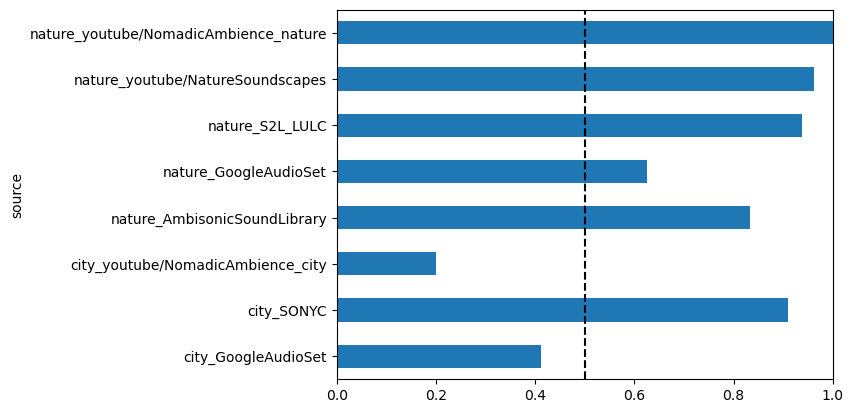

In [28]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()